In [13]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from google.colab import drive
import matplotlib.pyplot as plt

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [68]:
df = pd.read_csv('/content/drive/My Drive/Econometrics/realgdp.csv', dayfirst=True, sep=";", parse_dates=["observation_date"])
print(df.head())

  observation_date   RealGDP
0       1980-01-01  276315.0
1       1980-04-01  274089.3
2       1980-07-01  274503.7
3       1980-10-01  274075.1
4       1981-01-01  275093.9


In [59]:
df['LogDifGDP'] = np.log(df['RealGDP']).diff()
print(df.head())

  observation_date   RealGDP  LogDifGDP
0       1980-01-01  276315.0        NaN
1       1980-04-01  274089.3  -0.008088
2       1980-07-01  274503.7   0.001511
3       1980-10-01  274075.1  -0.001563
4       1981-01-01  275093.9   0.003710


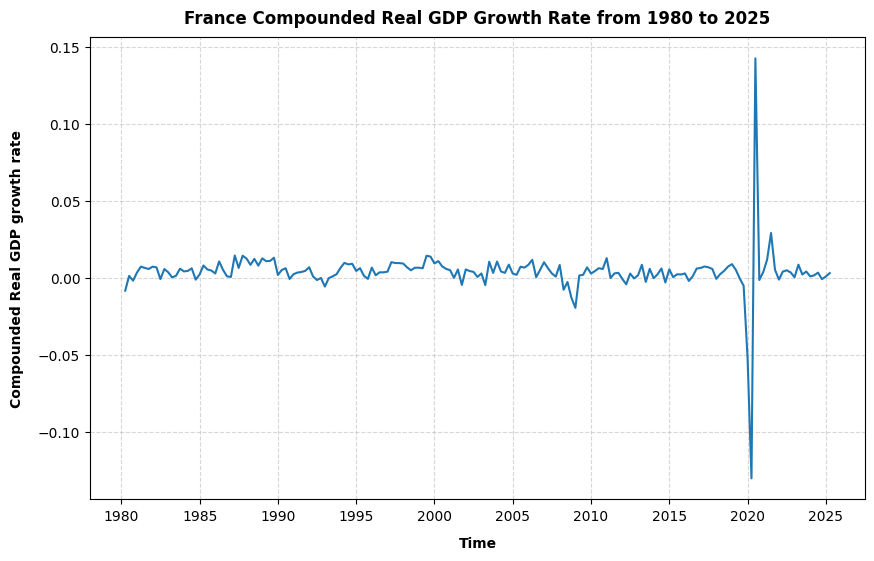

<Figure size 640x480 with 0 Axes>

In [19]:
X = df[['observation_date']]
y = df['LogDifGDP']

plt.figure(figsize=(10,6))
plt.plot(X,y)
plt.xlabel("Time", fontweight="bold", labelpad=10)
plt.ylabel("Compounded Real GDP growth rate", fontweight="bold", labelpad=10)
plt.title("France Compounded Real GDP Growth Rate from 1980 to 2025", fontweight="bold", pad=10)
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()
plt.savefig("CompoundedGR.png")

In [22]:
df_1 = pd.read_csv('/content/drive/My Drive/Econometrics/3m_rates.csv', sep=";", parse_dates=["observation_date"], dayfirst=True)
print(df_1.head())

  observation_date  Interbank_rates
0       1980-01-01            12.37
1       1980-02-01            12.63
2       1980-03-01            13.99
3       1980-04-01            12.94
4       1980-05-01            12.65


In [33]:
df_1["diff_rates"] = df_1['Interbank_rates'].diff()
print(df_1.head())

  observation_date  Interbank_rates  diff_rates
0       1980-01-01            12.37         NaN
1       1980-02-01            12.63        0.26
2       1980-03-01            13.99        1.36
3       1980-04-01            12.94       -1.05
4       1980-05-01            12.65       -0.29


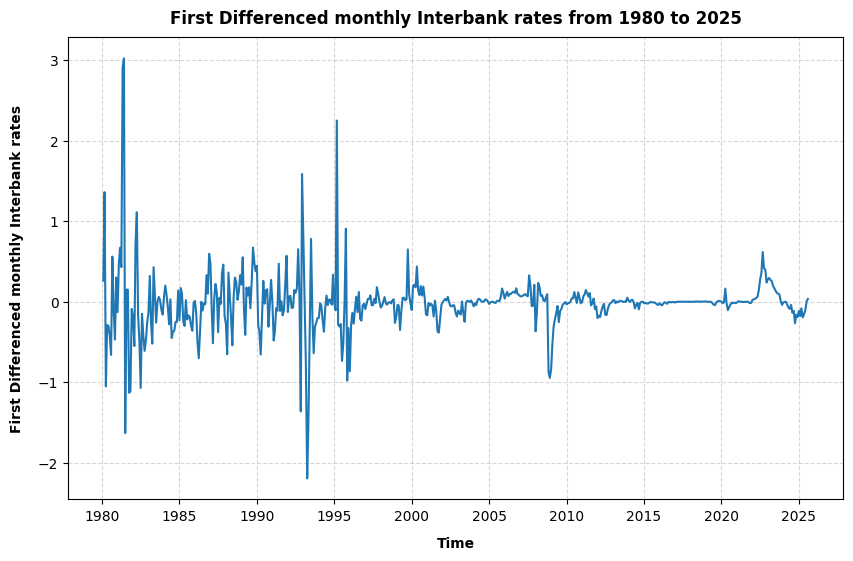

<Figure size 640x480 with 0 Axes>

In [38]:
X = df_1[['observation_date']]
y = df_1['diff_rates']

plt.figure(figsize=(10,6))
plt.plot(X,y)
plt.xlabel("Time", fontweight="bold", labelpad=10)
plt.ylabel("First Differenced monthly Interbank rates", fontweight="bold", labelpad=10)
plt.title("First Differenced monthly Interbank rates from 1980 to 2025", fontweight="bold", pad=10)
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()
plt.savefig("DiffRates.png")


In [40]:
df_2 = pd.read_csv('/content/drive/My Drive/Econometrics/10Y_rates.csv', sep=";", dayfirst=True, parse_dates=['observation_date'])
print(df_2.head())

  observation_date  10Y_rates
0       1980-01-01      12.52
1       1980-02-01      14.11
2       1980-03-01      14.44
3       1980-04-01      13.95
4       1980-05-01      13.49


In [42]:
df_2["diff_rates"] = df_2["10Y_rates"].diff()
print(df_2.head())

  observation_date  10Y_rates  diff_rates
0       1980-01-01      12.52         NaN
1       1980-02-01      14.11        1.59
2       1980-03-01      14.44        0.33
3       1980-04-01      13.95       -0.49
4       1980-05-01      13.49       -0.46


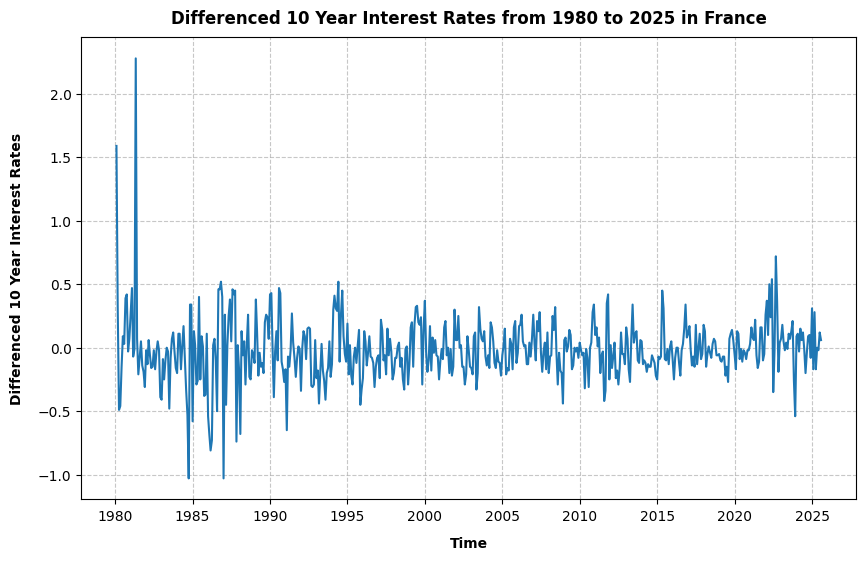

In [44]:
X = df_2["observation_date"]
y = df_2["diff_rates"]

plt.figure(figsize=(10,6))
plt.plot(X,y)
plt.xlabel("Time", fontweight="bold", labelpad=10)
plt.ylabel("Differenced 10 Year Interest Rates", fontweight="bold", labelpad=10)
plt.title("Differenced 10 Year Interest Rates from 1980 to 2025 in France", fontweight="bold", pad=10 )
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

In [92]:
m = (df.merge(df_1, on="observation_date", how="inner")
       .dropna()
       .sort_values("observation_date"))



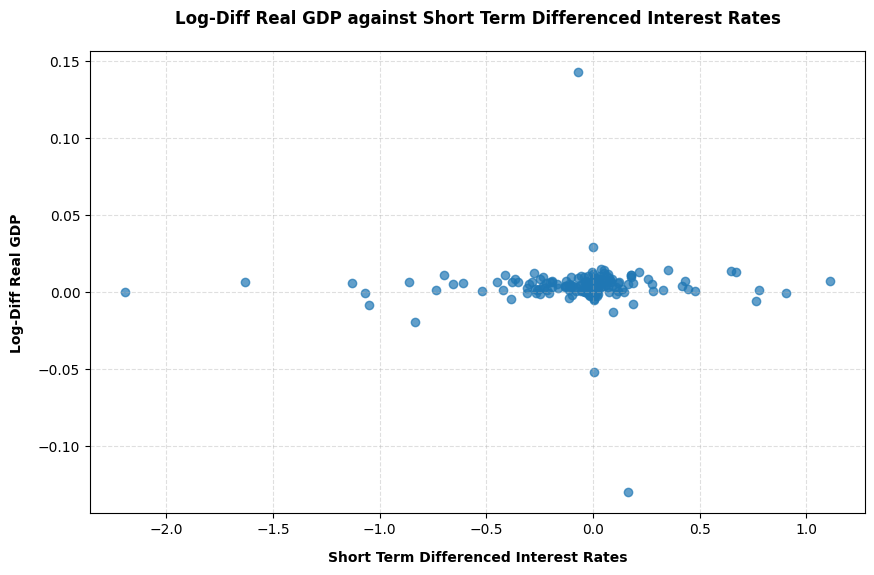

In [93]:
plt.figure(figsize=(10,6))
plt.scatter(m["diff_rates"], m["LogDifGDP"], alpha=0.7)
plt.xlabel("Short Term Differenced Interest Rates", labelpad=10, fontweight="bold")
plt.ylabel("Log-Diff Real GDP", labelpad=10, fontweight="bold")
plt.title("Log-Diff Real GDP against Short Term Differenced Interest Rates", pad=20, fontweight="bold")
plt.grid(True, linestyle="--", alpha=0.4)
plt.savefig("debtVSgdp.png")
plt.show()

In [94]:
m = (df.merge(df_2, on="observation_date", how="inner")
       .dropna()
       .sort_values("observation_date"))


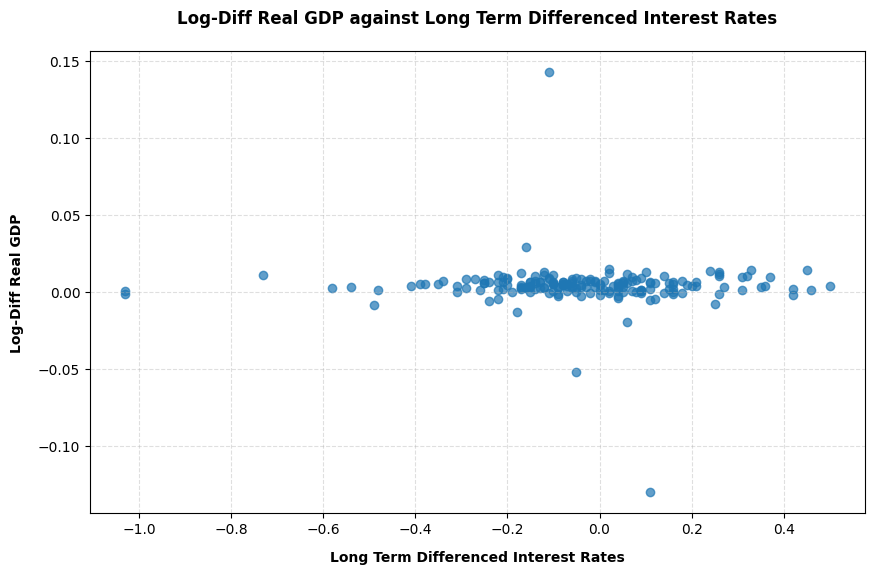

In [95]:
plt.figure(figsize=(10,6))
plt.scatter(m["diff_rates"], m["LogDifGDP"], alpha=0.7)
plt.xlabel("Long Term Differenced Interest Rates", labelpad=10, fontweight="bold")
plt.ylabel("Log-Diff Real GDP", labelpad=10, fontweight="bold")
plt.title("Log-Diff Real GDP against Long Term Differenced Interest Rates", pad=20, fontweight="bold")
plt.grid(True, linestyle="--", alpha=0.4)
plt.savefig("debtVSgdp.png")
plt.show()

In [96]:
m = (df_2.merge(df_1, on="observation_date", how="inner")
       .dropna()
       .sort_values("observation_date"))


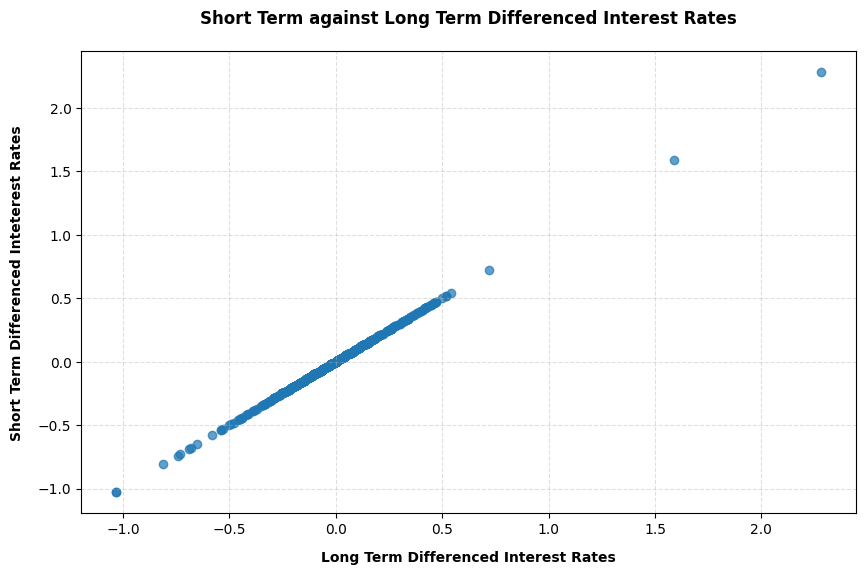

In [98]:
plt.figure(figsize=(10,6))
plt.scatter(m["diff_rates_x"], m["diff_rates_x"], alpha=0.7)
plt.xlabel("Long Term Differenced Interest Rates", labelpad=10, fontweight="bold")
plt.ylabel("Short Term Differenced Inteterest Rates", labelpad=10, fontweight="bold")
plt.title("Short Term against Long Term Differenced Interest Rates", pad=20, fontweight="bold")
plt.grid(True, linestyle="--", alpha=0.4)
plt.savefig("debtVSgdp.png")
plt.show()